In [1]:
# ============================================================
# MODELO 1: CLASIFICACIÓN BINARIA (BUENO/MALO)
# ============================================================
# Basado en el notebook de ejemplo "ANN Clasificación Binaria - Detección corazón.ipynb"
# y adaptado al Proyecto A: Riesgo Crediticio.
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Añadir ruta del proyecto
sys.path.append(str(Path.cwd().parent))
from src import config

# Cargar datos preprocesados (guardados por 02_Preprocesamiento.ipynb)
X_train = np.load(config.PROCESSED_DATA_DIR / 'X_train_bin.npy')
X_test = np.load(config.PROCESSED_DATA_DIR / 'X_test_bin.npy')
y_train = np.load(config.PROCESSED_DATA_DIR / 'y_train_bin.npy')
y_test = np.load(config.PROCESSED_DATA_DIR / 'y_test_bin.npy')

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nDistribución de clases en entrenamiento:")
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train).value_counts(normalize=True))

X_train: (800, 20), y_train: (800,)
X_test: (200, 20), y_test: (200,)

Distribución de clases en entrenamiento:
0    560
1    240
Name: count, dtype: int64
0    0.7
1    0.3
Name: proportion, dtype: float64


In [2]:
# ============================================================
# CONSTRUCCIÓN DEL MODELO
# ============================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

# Definir arquitectura
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\ferna\Downloads\Ejercicio ANN\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# ============================================================
# ENTRENAMIENTO CON EARLY STOPPING
# ============================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,          # 20% de train para validación
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5891 - loss: 0.7683 - val_accuracy: 0.6687 - val_loss: 0.6619
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6328 - loss: 0.6907 - val_accuracy: 0.6750 - val_loss: 0.6467
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6234 - loss: 0.6568 - val_accuracy: 0.6625 - val_loss: 0.6329
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6500 - loss: 0.6461 - val_accuracy: 0.6500 - val_loss: 0.6228
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6656 - loss: 0.6264 - val_accuracy: 0.6562 - val_loss: 0.6143
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.6255 - val_accuracy: 0.6562 - val_loss: 0.6076
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6049 - val_accuracy: 0.6687 - val_loss: 0.5992
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6844 - loss: 0.5915 - val_accuracy: 0.6812 - 

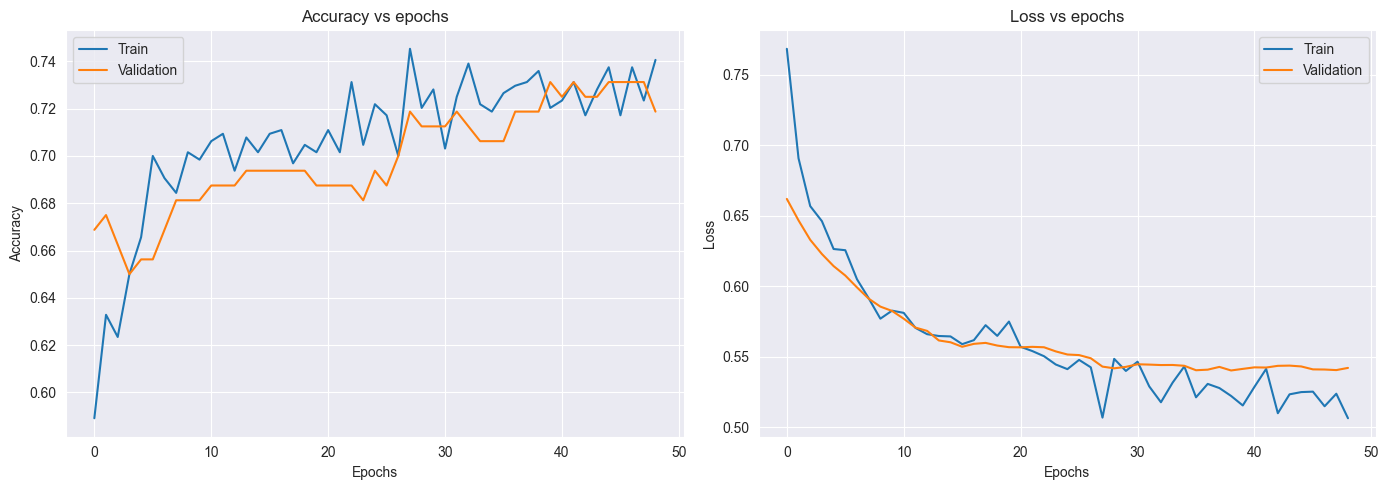

In [4]:
# ============================================================
# VISUALIZACIÓN DEL ENTRENAMIENTO
# ============================================================
# Graficar accuracy y loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Accuracy vs epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Loss
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Loss vs epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [5]:
# ============================================================
# EVALUACIÓN EN TEST
# ============================================================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss en test: {loss:.4f}")
print(f"Accuracy en test: {accuracy:.4f}")

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

Loss en test: 0.5194
Accuracy en test: 0.7450
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


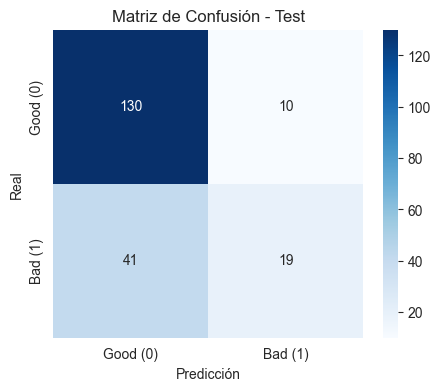


Classification Report:
              precision    recall  f1-score   support

        Good       0.76      0.93      0.84       140
         Bad       0.66      0.32      0.43        60

    accuracy                           0.74       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.73      0.74      0.71       200



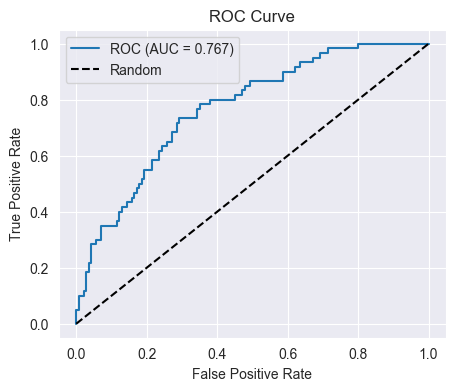

AUC: 0.7673


In [6]:
# ============================================================
# MÉTRICAS DETALLADAS
# ============================================================
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title('Matriz de Confusión - Test')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Good', 'Bad']))

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.4f}")

In [8]:
# Guardar matriz de confusión
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ... (código de evaluación existente) ...

# Guardar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Matriz de Confusión - Modelo Binario')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.savefig(config.MODELS_DIR / 'binary_confusion_matrix.png', bbox_inches='tight')
plt.close()

# Guardar curva ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Binario')
plt.legend()
plt.savefig(config.MODELS_DIR / 'binary_roc_curve.png', bbox_inches='tight')
plt.close()

# Guardar history (opcional, para el gráfico de líneas)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv(config.MODELS_DIR / 'binary_history.csv', index=False)

In [7]:
# ============================================================
# GUARDAR EL MODELO ENTRENADO
# ============================================================
model.save(config.BINARY_MODEL_PATH)
print(f"Modelo guardado en: {config.BINARY_MODEL_PATH}")

# También guardamos la historia del entrenamiento para análisis posterior
pd.DataFrame(history.history).to_csv(config.MODELS_DIR / 'binary_history.csv', index=False)
print("Historial de entrenamiento guardado en CSV.")

Modelo guardado en: C:\Users\ferna\Music\ProyectoA_RiesgoCrediticio_Oficial\models\binary_model.h5
Historial de entrenamiento guardado en CSV.
